In [ ]:
# text classification and predicting next words

In [1]:
# Classification on json file and training Positive and Negative sentiments

# Run this to ensure TensorFlow 2.x is used
try:
  %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size =400
embedding_dim = 8
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 60


with open("Sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length,
                                padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length,
                               padding=padding_type, truncating=trunc_type)

# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),     
    #tf.keras.layers.Flatten()
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()


num_epochs = 10
history = model.fit(training_padded, training_labels, epochs=num_epochs,
                    validation_data=(testing_padded, testing_labels), verbose=2)

import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 8)            3200      
_________________________________________________________________
global_average_pooling1d (Gl (None, 8)                 0         
_________________________________________________________________
dense (Dense)                (None, 24)                216       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 3,441
Trainable params: 3,441
Non-trainable params: 0
_________________________________________________________________
Train on 60 samples, validate on 29 samples
Epoch 1/10
60/60 - 1s - loss: 0.6927 - accuracy: 0.6167 - val_loss: 0.6929 - val_accuracy: 0.5172
Epoch 2/10
60/60 - 0s - loss: 0.6909 - accuracy: 0.6333 - val_loss: 0.6928 - val_accuracy: 0.5172
Epoch 3/10
6

In C:\Users\Leila\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Leila\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Leila\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Leila\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Leila\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [2]:
# To reverse indexs to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])


def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print('Decoded sentence : ', decode_sentence(training_padded[2]))
print('training sentence : ', training_sentences[2])
print('label: ',labels[2])

e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for word_num in range (1, vocab_size) :
    word = reverse_word_index [word_num]
    embeddings = weights [word_num]
    out_m.write (word + '\n')
    out_v.write ('\t'.join([str(x) for x in embeddings]) + '\n')


out_v.close()
out_m.close()

try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print('model.predict : ', model.predict(padded))

Decoded sentence :  mom starting to fear son's web series closest thing she will have to grandchild ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
training sentence :  mom starting to fear son's web series closest thing she will have to grandchild
label:  1
(400, 8)
model.predict :  [[0.47435996]
 [0.4740265 ]]


In [2]:
# Tendorflow dataset


# NOTE: PLEASE MAKE SURE YOU ARE RUNNING THIS IN A PYTHON3 ENVIRONMENT

import tensorflow as tf
print(tf.__version__)
!pip install tensorflow==2.0.0-alpha0

2.0.0-alpha0


In [8]:
# Double check TF 2.0x is installed. If you ran the above block, there was a 
# 'reset all runtimes' button at the bottom that you needed to press
import tensorflow as tf
print(tf.__version__)

# If the import fails, run this
# !pip install -q tensorflow-datasets

import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

train_data, test_data = imdb['train'], imdb['test']

tokenizer = info.features['text'].encoder
print('info: ',info)

sample_string = 'TensorFlow, from basics to mastery'

tokenized_string = tokenizer.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print ('The original string: {}'.format(original_string))


for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))



2.0.0-alpha0
info:  tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng,

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
25000/25000 [==============================] - 509s 20ms/step - loss: 0.6872 - accuracy: 0.5306 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
25000/25000 [==============================] - 429s 17ms/step - loss: 0.6847 -

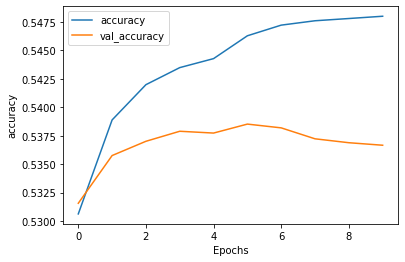

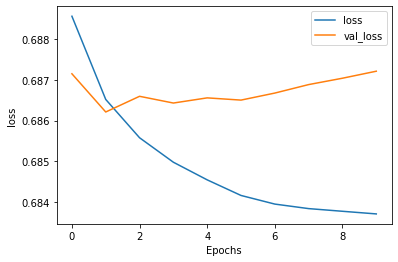

(8185, 64)


In [11]:
# Classifying IMDB dataset (to generte and predict unseen text )
BUFFER_SIZE = 10000
BATCH_SIZE = 64

# train_dataset = train_data.shuffle(BUFFER_SIZE)
# train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
# test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

num_epochs = 10

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_data, epochs=num_epochs, validation_data=test_data)

import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, tokenizer.vocab_size):
  word = tokenizer.decode([word_num])
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()


try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

## classifier faild to create any meaningfull results ##
#main reasons: context of words are hard to follow based on subwords

In [43]:
# implementing some models to predict unseen words which show overfitting

# implementing LSTM <last short term memory> 

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

# 2 layers LSTM 

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

# / GRU layer
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim=64, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()


# Convolution layer
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 120, input_length=16),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()


Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_34 (Embedding)     (None, None, 64)          523840    
_________________________________________________________________
bidirectional_14 (Bidirectio (None, 128)               66048     
_________________________________________________________________
dense_68 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_35 (Embedding)     (None, None, 64)          523840    
________________________

Epoch 1/500
453/453 [==============================] - 1s 2ms/sample - loss: 5.5689 - accuracy: 0.0243
Epoch 2/500
453/453 [==============================] - 0s 398us/sample - loss: 5.5443 - accuracy: 0.0795
Epoch 3/500
453/453 [==============================] - 0s 407us/sample - loss: 5.4808 - accuracy: 0.0751
Epoch 4/500
453/453 [==============================] - 0s 368us/sample - loss: 5.3023 - accuracy: 0.0530
Epoch 5/500
453/453 [==============================] - 0s 374us/sample - loss: 5.1239 - accuracy: 0.0508
Epoch 6/500
453/453 [==============================] - 0s 383us/sample - loss: 5.0687 - accuracy: 0.0530
Epoch 7/500
453/453 [==============================] - 0s 348us/sample - loss: 5.0337 - accuracy: 0.0552
Epoch 8/500
453/453 [==============================] - 0s 357us/sample - loss: 5.0035 - accuracy: 0.0552
Epoch 9/500
453/453 [==============================] - 0s 335us/sample - loss: 4.9718 - accuracy: 0.0508
Epoch 10/500
453/453 [==============================] - 0

453/453 [==============================] - 0s 504us/sample - loss: 2.3673 - accuracy: 0.5364
Epoch 79/500
453/453 [==============================] - 0s 497us/sample - loss: 2.3366 - accuracy: 0.5563
Epoch 80/500
453/453 [==============================] - 0s 521us/sample - loss: 2.3138 - accuracy: 0.5585
Epoch 81/500
453/453 [==============================] - 0s 476us/sample - loss: 2.2885 - accuracy: 0.5585
Epoch 82/500
453/453 [==============================] - 0s 509us/sample - loss: 2.2666 - accuracy: 0.5762
Epoch 83/500
453/453 [==============================] - 0s 502us/sample - loss: 2.2404 - accuracy: 0.5717
Epoch 84/500
453/453 [==============================] - 0s 516us/sample - loss: 2.2142 - accuracy: 0.5982
Epoch 85/500
453/453 [==============================] - 0s 518us/sample - loss: 2.1949 - accuracy: 0.6004 - loss: 2.1366 - accuracy: 0.
Epoch 86/500
453/453 [==============================] - 0s 507us/sample - loss: 2.1695 - accuracy: 0.6004
Epoch 87/500
453/453 [=======

453/453 [==============================] - 0s 516us/sample - loss: 1.1243 - accuracy: 0.8212
Epoch 155/500
453/453 [==============================] - 0s 489us/sample - loss: 1.1044 - accuracy: 0.8190
Epoch 156/500
453/453 [==============================] - 0s 463us/sample - loss: 1.0939 - accuracy: 0.8278
Epoch 157/500
453/453 [==============================] - 0s 506us/sample - loss: 1.0713 - accuracy: 0.8366
Epoch 158/500
453/453 [==============================] - 0s 493us/sample - loss: 1.0570 - accuracy: 0.8411
Epoch 159/500
453/453 [==============================] - 0s 499us/sample - loss: 1.0465 - accuracy: 0.8366
Epoch 160/500
453/453 [==============================] - 0s 504us/sample - loss: 1.0322 - accuracy: 0.8411
Epoch 161/500
453/453 [==============================] - 0s 516us/sample - loss: 1.0229 - accuracy: 0.8433
Epoch 162/500
453/453 [==============================] - 0s 500us/sample - loss: 1.0112 - accuracy: 0.8433
Epoch 163/500
453/453 [============================

453/453 [==============================] - 0s 505us/sample - loss: 0.5359 - accuracy: 0.9272
Epoch 231/500
453/453 [==============================] - 0s 505us/sample - loss: 0.5301 - accuracy: 0.9272
Epoch 232/500
453/453 [==============================] - 0s 503us/sample - loss: 0.5260 - accuracy: 0.9249
Epoch 233/500
453/453 [==============================] - 0s 504us/sample - loss: 0.5218 - accuracy: 0.9272
Epoch 234/500
453/453 [==============================] - 0s 513us/sample - loss: 0.5221 - accuracy: 0.9227
Epoch 235/500
453/453 [==============================] - 0s 506us/sample - loss: 0.5190 - accuracy: 0.9227
Epoch 236/500
453/453 [==============================] - 0s 514us/sample - loss: 0.5091 - accuracy: 0.9316 - loss: 0.5108 - accuracy: 0.
Epoch 237/500
453/453 [==============================] - 0s 502us/sample - loss: 0.5035 - accuracy: 0.9294
Epoch 238/500
453/453 [==============================] - 0s 513us/sample - loss: 0.5003 - accuracy: 0.9294
Epoch 239/500
453/453

453/453 [==============================] - 0s 512us/sample - loss: 0.2935 - accuracy: 0.9448
Epoch 307/500
453/453 [==============================] - 0s 502us/sample - loss: 0.2893 - accuracy: 0.9492
Epoch 308/500
453/453 [==============================] - 0s 515us/sample - loss: 0.2859 - accuracy: 0.9492
Epoch 309/500
453/453 [==============================] - 0s 513us/sample - loss: 0.2838 - accuracy: 0.9492
Epoch 310/500
453/453 [==============================] - 0s 495us/sample - loss: 0.2812 - accuracy: 0.9492
Epoch 311/500
453/453 [==============================] - 0s 476us/sample - loss: 0.2793 - accuracy: 0.9492
Epoch 312/500
453/453 [==============================] - 0s 424us/sample - loss: 0.2769 - accuracy: 0.9536
Epoch 313/500
453/453 [==============================] - 0s 518us/sample - loss: 0.2765 - accuracy: 0.9514
Epoch 314/500
453/453 [==============================] - 0s 528us/sample - loss: 0.2750 - accuracy: 0.9514
Epoch 315/500
453/453 [============================

453/453 [==============================] - 0s 509us/sample - loss: 0.1891 - accuracy: 0.9514
Epoch 383/500
453/453 [==============================] - 0s 507us/sample - loss: 0.1883 - accuracy: 0.9492
Epoch 384/500
453/453 [==============================] - 0s 513us/sample - loss: 0.1879 - accuracy: 0.9514
Epoch 385/500
453/453 [==============================] - 0s 508us/sample - loss: 0.1878 - accuracy: 0.9492
Epoch 386/500
453/453 [==============================] - 0s 493us/sample - loss: 0.1868 - accuracy: 0.9514
Epoch 387/500
453/453 [==============================] - 0s 508us/sample - loss: 0.1851 - accuracy: 0.9492
Epoch 388/500
453/453 [==============================] - 0s 503us/sample - loss: 0.1840 - accuracy: 0.9536
Epoch 389/500
453/453 [==============================] - 0s 499us/sample - loss: 0.1836 - accuracy: 0.9492
Epoch 390/500
453/453 [==============================] - 0s 510us/sample - loss: 0.1839 - accuracy: 0.9470
Epoch 391/500
453/453 [============================

453/453 [==============================] - 0s 512us/sample - loss: 0.1536 - accuracy: 0.9448
Epoch 459/500
453/453 [==============================] - 0s 538us/sample - loss: 0.1578 - accuracy: 0.9448
Epoch 460/500
453/453 [==============================] - 0s 507us/sample - loss: 0.1514 - accuracy: 0.9492
Epoch 461/500
453/453 [==============================] - 0s 512us/sample - loss: 0.1479 - accuracy: 0.9470
Epoch 462/500
453/453 [==============================] - 0s 517us/sample - loss: 0.1467 - accuracy: 0.9536
Epoch 463/500
453/453 [==============================] - 0s 524us/sample - loss: 0.1448 - accuracy: 0.9514
Epoch 464/500
453/453 [==============================] - 0s 521us/sample - loss: 0.1453 - accuracy: 0.9426
Epoch 465/500
453/453 [==============================] - 0s 523us/sample - loss: 0.1430 - accuracy: 0.9514
Epoch 466/500
453/453 [==============================] - 0s 521us/sample - loss: 0.1431 - accuracy: 0.9492
Epoch 467/500
453/453 [============================

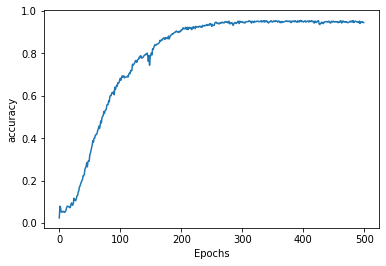

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

tokenizer = Tokenizer()

data = "In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."
corpus = data.lower().split('\n')
tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index
total_words = len(word_index) +1

input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
#     print('token list: ', token_list)
    for i in range(1, len(token_list)):
        n_grm_sequence = token_list[:i+1]
#         print(n_grm_sequence )
        input_sequences.append(n_grm_sequence )
        
max_sequence_len = max([len(x) for x in input_sequences])

# creating data set consist of data and labels
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# considering and seperating last column as labels 
xs, labels  = input_sequences[:,:-1],  input_sequences[:,-1]

# create a matrix contains labels
ys =tf.keras.utils.to_categorical(labels, num_classes=total_words)


model = tf.keras.Sequential()
model.add( tf.keras.layers.Embedding(total_words, 64, input_length=(max_sequence_len-1)))
model.add( tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)))
model.add( tf.keras.layers.Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=500, verbose=1)


import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')



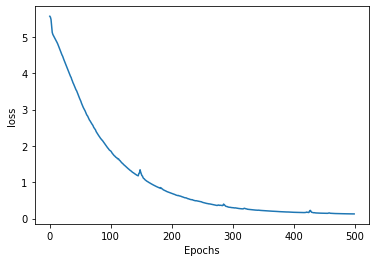

In [10]:
plot_graphs(history, "loss")

In [21]:
# Predicting the next 100 words after seed_text

seed_text = "Laurence went to dublin"
next_words = 100
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

# we witness some repeated words in prediction , this is because of LSTM was only carrying context forward 

Laurence went to dublin merry a under the same cask cask pound wine a cask eyes cask eyes rose catchers daughter eyes mchugh eyes mchugh eyes mchugh eyes mchugh eyes mchugh eyes mchugh eyes mchugh eyes mchugh eyes mchugh eyes mchugh eyes mchugh eyes mchugh eyes mchugh eyes mchugh eyes mchugh eyes mchugh eyes mchugh eyes mchugh eyes mchugh eyes mchugh eyes mchugh eyes mchugh eyes mchugh eyes mchugh eyes mchugh eyes mchugh eyes mchugh eyes mchugh eyes mchugh eyes mchugh eyes mchugh eyes mchugh eyes mchugh eyes mchugh eyes mchugh eyes mchugh eyes mchugh eyes mchugh eyes mchugh eyes mchugh eyes mchugh eyes


'wget' is not recognized as an internal or external command,
operable program or batch file.


{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

Epoch 1/100
12038/12038 [==============================] - 13s 1ms/sample - loss: 6.5935 - accuracy: 0.0790
Epoch 2/100
12038/12038 [==============================] - 13s 1ms/sample - loss: 5.6809 - accuracy: 0.1166
Epoch 3/100
12038/12038 [==============================] - 15s 1ms/sample - loss: 4.8064 - accuracy: 0.1656
Epoch 4/100
12038/12038 [==============================] - 15s 1ms/sample - loss: 3.8991 - accuracy: 0.2417
Epoch 5/100
12038/12038 [==============================] - 15s 1ms/sample - loss: 3.0566 - accuracy: 0.3441
Epoch 6/100
12038/12038 [==============================] - 16s 1ms/sample - loss: 2.3990 - accuracy: 0.4542
Epoch 7/100
12038/12038 [==============================] - 14s 1ms/sample - loss: 1.9209 - accuracy: 0.5485
Epoch 8/100
12038/12038 [==============================] - 16s 1ms/sample - loss: 1.6175 - accuracy: 0.6157
Epoch 9/100
12038/12038 [==============================] - 16s 1ms/sample - loss: 1.4057 - accuracy: 0.6664
Epoch 10/100
12038/12038 [==

12038/12038 [==============================] - 12s 1ms/sample - loss: 1.0257 - accuracy: 0.7432
Epoch 77/100
12038/12038 [==============================] - 12s 1ms/sample - loss: 1.0461 - accuracy: 0.7340
Epoch 78/100
12038/12038 [==============================] - 12s 1ms/sample - loss: 1.0356 - accuracy: 0.7409
Epoch 79/100
12038/12038 [==============================] - 12s 1ms/sample - loss: 0.9850 - accuracy: 0.7498
Epoch 80/100
12038/12038 [==============================] - 12s 1ms/sample - loss: 0.9848 - accuracy: 0.7492
Epoch 81/100
12038/12038 [==============================] - 12s 1ms/sample - loss: 0.8913 - accuracy: 0.7721
Epoch 82/100
12038/12038 [==============================] - 12s 1ms/sample - loss: 0.8697 - accuracy: 0.7757
Epoch 83/100
12038/12038 [==============================] - 12s 1ms/sample - loss: 0.8420 - accuracy: 0.7799
Epoch 84/100
12038/12038 [==============================] - 12s 1ms/sample - loss: 0.8707 - accuracy: 0.7755
Epoch 85/100
12038/12038 [======

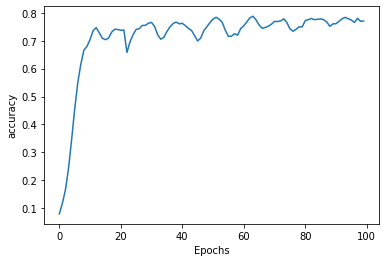

I've got a bad feeling about this narrow street he stepped so smiling proud and young strength love in right i love gone gone by in every from there i got away cursing rocky sinking rocky high rocky eyes friend i nest rocky right love them love love love love love in botany bay love in sinking galway i sinking man now six clung sinking love sinking spirit gain green december love i right love be adored love sail man sinking women show i show love gone by love this love love love love love love love love love bride my love love gone but keep your


In [24]:

import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

tokenizer = Tokenizer()

data = open('irish-lyrics-eof.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

print(xs[6])

print(ys[6])

print(xs[5])
print(ys[5])

print(tokenizer.word_index)

model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)


import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)



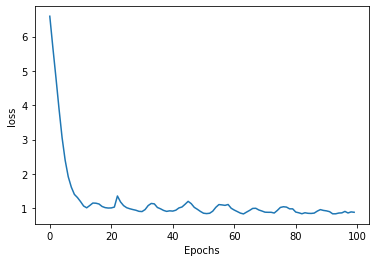

In [25]:
plot_graphs(history, 'loss')
